<b><font size=6 color='black'>포트폴리오 - 1</font>

## 1. 기본 설정 & 패키지 임포트

In [322]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import re

warnings.filterwarnings(action='ignore')
plt.rc('font',family='Malgun Gothic')  
plt.rc('axes',unicode_minus=False)

pd.set_option('display.max_rows', 500)

## 2. 부동산 데이터 불러오기 &

In [421]:
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')
df_last = pd.read_csv('data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv',encoding='cp949')

In [423]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [325]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5780 non-null   object
 1   규모구분     5780 non-null   object
 2   연도       5780 non-null   int64 
 3   월        5780 non-null   int64 
 4   분양가격(㎡)  5331 non-null   object
dtypes: int64(2), object(3)
memory usage: 225.9+ KB


분양가격(㎡) 변수에 결측치가 다수존재 함. 이외 변수에는 결측치 없음. 

또한 분양가격이 데이터 타입이 문자형으로 되어있기 때문에 이후 수치형으로 변환이 필요

In [326]:
np.unique(real_estate['연도'])

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [327]:
np.unique(real_estate['월'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

해당 데이터는 2015년 부터 2021년 까지 매월 규모구분에 따른 분양가격이 정리되어있다

## 3. 부동산 데이터 전처리

### (0) 컬럼명 변경

In [328]:
real_estate.columns = ['region','scale','year','month','price_per_meter']

### (1) 결측치 처리

In [329]:
real_estate['price_per_meter'].isna().sum()

449

In [330]:
len(real_estate)

5780

In [331]:
real_estate.dropna(inplace=True)

In [332]:
real_estate['price_per_meter'].isna().sum()

0

전체 데이터 수에 비해 결측치의 수가 상당히 많은 것이 아니므로 과감히 분양가격이 결측치인 행은 삭제

In [333]:
real_estate['price_per_meter'].str.contains(' ').sum()

16

In [334]:
real_estate = real_estate[real_estate.price_per_meter.str.contains(' ')==False]

분양가격 데이터에 ' ' 그냥 이런 식으로 공백이 들어간 데이터가 16개 존재한다. 결측치로 간주하고 행 삭제

In [335]:
real_estate['price_per_meter'].str.contains(',').sum()

76

In [336]:
real_estate.price_per_meter = real_estate.price_per_meter.str.replace(',','')

분양 가격 수치값에 , 콤마가 들어간 데이터가 존재해서 해당 데이터의 콤마는 삭제해준다

### (2) 데이터 타입 변경 

In [338]:
real_estate.price_per_meter = real_estate.price_per_meter.astype('float64')

분양 가격 변수가 문자열로 되어있으므로 수치형 데이터 타입으로 변경해준다

### (3) 규모구분 변수 데이터 간략화

먼저 규모구분의 데이터가 너무 긴 문자열이라 메모리 낭비가 심할 수 있으므로 간략화한다

In [339]:
np.unique(real_estate['scale'])

array(['모든면적', '전용면적 102㎡초과', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하',
       '전용면적 85㎡초과 102㎡이하'], dtype=object)

In [340]:
real_estate.loc[real_estate.scale == '모든면적','scale'] = 'total'
real_estate.loc[real_estate.scale == '전용면적 102㎡초과','scale'] = '>120'
real_estate.loc[real_estate.scale == '전용면적 60㎡이하','scale'] = '<60'
real_estate.loc[real_estate.scale == '전용면적 60㎡초과 85㎡이하','scale'] = '60-85'
real_estate.loc[real_estate.scale == '전용면적 85㎡초과 102㎡이하','scale'] = '85-102'

### (4)  미터당 분양 가격으로 부터 평당 분양가격 파생변수 추가

In [346]:
real_estate['price_per_pyung'] = real_estate.price_per_meter*0.3025

## 4. 부동산 데이터를 df_first와 df_last로 분리

In [348]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5315 entries, 0 to 5779
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           5315 non-null   object 
 1   scale            5315 non-null   object 
 2   year             5315 non-null   int64  
 3   month            5315 non-null   int64  
 4   price_per_meter  5315 non-null   float64
 5   price_per_pyung  5315 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 290.7+ KB


In [405]:
real_estate['date'] = real_estate['year'].astype('string').str.cat(real_estate['month'].astype('string'),sep="/")

real_estate.date = real_estate.date.apply(lambda x: datetime.strptime(x, '%Y/%m'))

df_first = real_estate.loc[(real_estate.date >='2015-09-01') & (real_estate.date<='2017-08-01')]

df_first = df_first.iloc[:,:-1]

2015년 9월 부터 2017년 8월 까지의 데이터를 df_first데이터 프레임에 담았다. (원본 데이터에 2015년 10월 부터 있어서 2015년 9월은 안나옴)

In [406]:
df_last = real_estate.loc[(real_estate.date >='2017-09-01') ]

df_last = df_last.iloc[:,:-1]

2017년 9월 이후 데이터는 df_last 데이터 프레임에 담았다

## 5. df_first 데이터프레임 EDA

### (1) 지역별 데이터 수

In [351]:
df_first.groupby('region').count().sort_values(ascending=False,by='scale')

,scale,year,month,price_per_meter,price_per_pyung
region,,,,,
서울,115,115,115,115,115
경기,115,115,115,115,115
충남,115,115,115,115,115
전북,115,115,115,115,115
전남,115,115,115,115,115
인천,115,115,115,115,115
세종,115,115,115,115,115
충북,115,115,115,115,115
부산,115,115,115,115,115


### (2) 지역별 평당 분양 가격

In [354]:
df_first.pivot_table(index='region',values=['price_per_pyung']).sort_values(ascending=False,by='price_per_pyung')

,price_per_pyung
region,
서울,1974.906761
경기,1081.926761
인천,1027.905522
부산,1000.872543
대구,986.141969
제주,960.700421
울산,906.874833
대전,851.206933
광주,846.459167


서울이 평당 평균 분양가가 압도적으로 높다. 이후 경기,인천,부산,대구가 비슷하게 높은 수준을 보였다.

### (3) 전용면적별 평당 분양가격

In [355]:
df_first.pivot_table(index='scale',values=['price_per_pyung']).sort_values(ascending=False,by='price_per_pyung')

,price_per_pyung
scale,
>120,980.484630
85-102,930.135112
<60,879.176155
total,863.263050
60-85,862.265806


### (4) 지역별, 전용면적별 평당 분양가격

In [356]:
by_scale_region_table = df_first.pivot_table(index=['scale','region'],values=['price_per_pyung']).sort_values(ascending=False,by='price_per_pyung').reset_index()

In [357]:
by_scale_region_table.pivot_table(index=['region'],columns=['scale'],values=['price_per_pyung'])

price_per_pyung                                                    
scale            60-85       85-102          <60         >120        total
region                                                                    
강원          648.678370   651.665667   650.348696   691.738587   643.720000
경기         1039.547826  1041.060326  1077.347174  1214.445435  1037.233043
경남          721.120543   897.478043   738.073696   832.519457   721.501957
경북          686.030543   799.034022   682.571522   753.040870   684.991522
광주          823.089348   849.900441   752.874737  1012.823382   821.629457
대구          962.555000   864.746667  1016.373696  1118.592391   957.885978
대전          781.502174   779.987353   815.303261  1309.220000   790.406196
부산          972.590109   968.223587   924.768804  1155.905109   982.875109
서울         1899.792065  2117.578913  1969.748478  1986.478043  1900.936304
세종          816.315978   814.316848   818.196739   813.895978   814.750870
울산          975.286304   812.259038   816.842065   916.259348   972.590109
인천          964.580435  1033.642500   973.300326  1198.689130   969.315217
전남          609.879457   708.862717   619.927717   676.916087   609.971522
전북          609.971522   704.417283   635.157935   699.564130   609.353370
제주          850.919348   984.830000  1192.027941   969.320000   868.175000
충남          671.589457   830.336196   704.667174   794.667500   671.839348
충북          625.070217   742.440217   618.112717   703.628152   618.296848

### (5) 연도, 지역별 평당 평균 분양 가격 

In [358]:
by_time_region_table =df_first.pivot_table(index=['year','region'],values=['price_per_pyung']).sort_values(ascending=False,by='price_per_pyung').reset_index()

In [359]:
by_time_region_table.pivot_table(index=['region'],columns=['year'],values=['price_per_pyung'])

price_per_pyung                          
year              2015         2016         2017
region                                          
강원          658.905500   656.599519   658.534938
경기         1013.919500  1071.122250  1123.636250
경남          775.428500   778.866917   789.562812
경북          684.214667   710.728792   750.585687
광주          725.697500   842.479306   882.619375
대구          826.732500   942.519417  1117.944474
대전          750.805000   816.817222   920.015938
부산          951.261667   984.824042  1043.549375
서울         1862.270667  1994.064875  1988.408125
세종          803.460167   811.965458   825.303187
울산          858.696667   878.402629   981.064219
인천         1006.135167  1017.413375  1051.807625
전남          623.230667   635.855000   667.201562
전북          651.786667   633.107292   679.536000
제주          728.848542   877.019000  1145.317938
충남          704.905667   729.503958   753.436750
충북          625.973333   653.889042   686.266625

## 6. 데이터 시각화

### (1) 지역 vs 평당 분양가격 그래프 - 라인 그래프

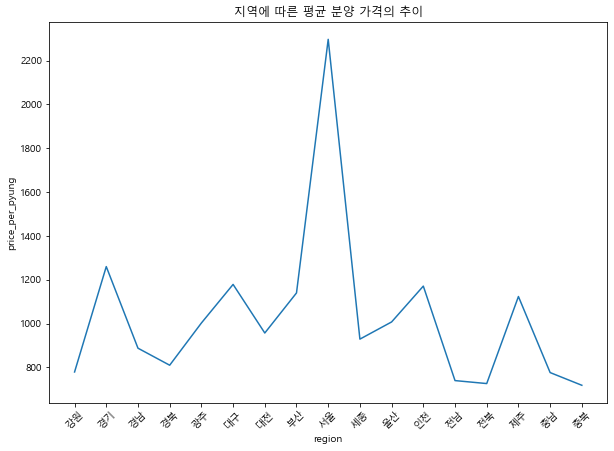

In [390]:
mean_price_groupby_region = real_estate.groupby('region').mean().reset_index()


plt.figure(figsize=(10,7))
sns.lineplot(data=mean_price_groupby_region,x='region',y='price_per_pyung')
plt.xticks(rotation=45)
plt.title('지역에 따른 평균 분양 가격의 추이')
plt.show()

### (2) 지역 vs 평당 분양가격 그래프 - 바 차트

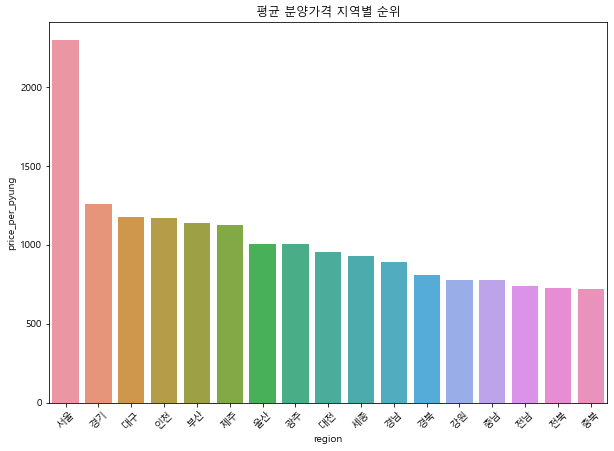

In [391]:
mean_price_groupby_region = real_estate.groupby('region').mean().sort_values(by='price_per_pyung',ascending=False).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=mean_price_groupby_region,x='region',y='price_per_pyung', ci=False)
plt.xticks(rotation=45)
plt.title('평균 분양가격 지역별 순위')
plt.show()

### (3) 전용 면적 단위 별 평균 분양 가격의 차이 그래프

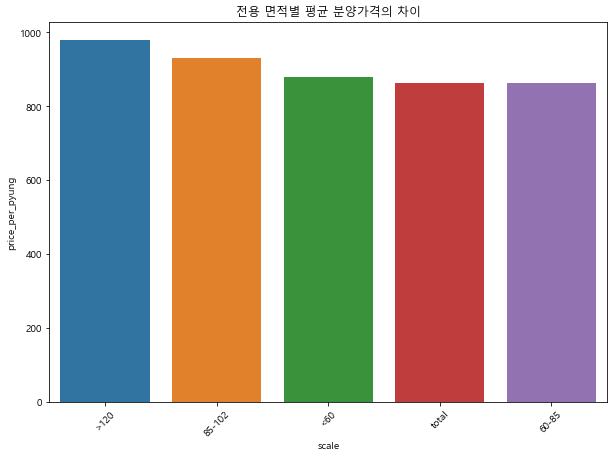

In [362]:
mean_price_groupby_scale = df_first.groupby('scale').mean().sort_values(by='price_per_pyung',ascending=False).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=mean_price_groupby_scale,x='scale',y='price_per_pyung', ci=False)
plt.xticks(rotation=45)
plt.title('전용 면적별 평균 분양가격의 차이')
plt.show()

### (4) 연도에 따른 평당 분양가 변화 추이 - 라인 그래프

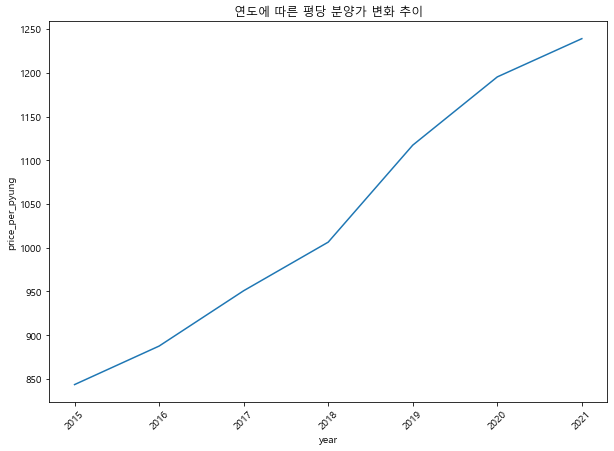

In [389]:
mean_price_groupby_year = real_estate.groupby('year').mean().reset_index()


plt.figure(figsize=(10,7))
sns.lineplot(data=mean_price_groupby_year,x='year',y='price_per_pyung')
plt.xticks(rotation=45)
plt.title('연도에 따른 평당 분양가 변화 추이')
plt.show()

### (4) 연도에 따른 평당 분양가 변화 추이 - 바 차트

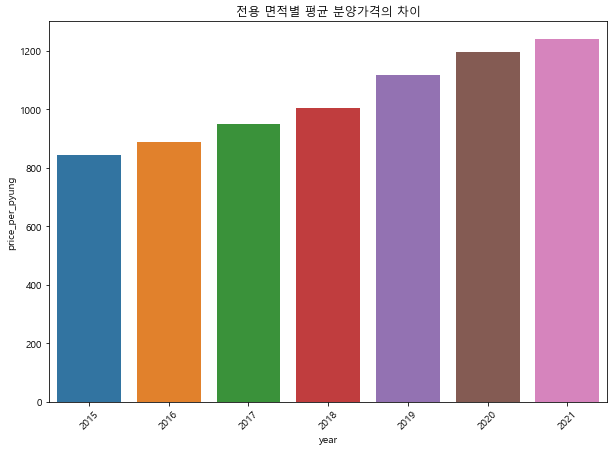

In [400]:
mean_price_groupby_year = real_estate.groupby('year').mean().sort_values(by='price_per_pyung',ascending=False).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=mean_price_groupby_year,x='year',y='price_per_pyung', ci=False)
plt.xticks(rotation=45)
plt.title('전용 면적별 평균 분양가격의 차이')
plt.show()

### (5) 연도별  평당 분양가의 변화

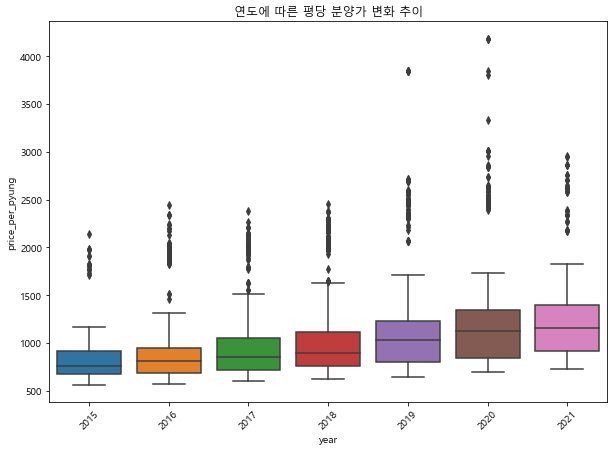

In [396]:
plt.figure(figsize=(10,7))
sns.boxplot(data=real_estate,x='year',y='price_per_pyung')
plt.xticks(rotation=45)
plt.title('연도에 따른 평당 분양가 변화 추이')
plt.show()

### (6) 전용면적별 평당 분양가의 변화

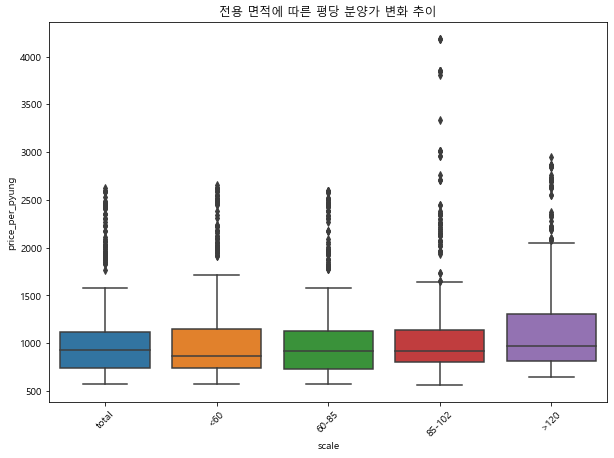

In [398]:
plt.figure(figsize=(10,7))
sns.boxplot(data=real_estate,x='scale',y='price_per_pyung')
plt.xticks(rotation=45)
plt.title('전용 면적에 따른 평당 분양가 변화 추이')
plt.show()

## 7. df_first 와 df_last를 합쳐 하나의 데이터 프레임으로 만들고, 분석

In [407]:
combined = pd.concat([df_first, df_last],axis=0)

In [409]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5315 entries, 0 to 5779
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           5315 non-null   object 
 1   scale            5315 non-null   object 
 2   year             5315 non-null   int64  
 3   month            5315 non-null   int64  
 4   price_per_meter  5315 non-null   float64
 5   price_per_pyung  5315 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 290.7+ KB


결측치 처리는 이미 분리하기 전 원본 데이터에서 처리 하였으므로 이상이 없다

### (1) 연도별 평당 분양 가격

In [417]:
combined.pivot_table(index=['year'],values=['price_per_pyung'])

,price_per_pyung
year,
2015,843.584115
2016,887.610625
2017,950.851818
2018,1006.402688
2019,1117.260200
2020,1195.280391
2021,1238.999919


### (2) 지역별 평당 분양 가격

In [419]:
combined.pivot_table(index=['region'],values=['price_per_pyung']).sort_values(by='price_per_pyung' ,ascending=False)

,price_per_pyung
region,
서울,2296.735699
경기,1260.182081
대구,1178.876314
인천,1171.193571
부산,1140.033529
제주,1123.664541
울산,1007.712144
광주,1002.801298
대전,957.246422
